# Winners
## Purpose
Completes analysis of Who wins in the Olympics
## Datasets
<b>complete_data.csv</b> - A csv containing relevant data created in 1000-Joining.ipynb notebook

Import necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os.path
import matplotlib

In [3]:
filepath = '../../data/analysis/complete_data.csv'

Loads the file into a dataframe

In [4]:
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    df = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


Prints the frirst 5 lines of the dataframe

In [5]:
df.head()

,Unnamed: 0,Year,Host_Country,Host_City,Summer,Winter,Total_Males,Total_Females,Total_Athletes,Discipline,...,CO2_Emissions,Methane_Emissions,Nitrous_Oxide_Emisions,Total_Emissions,Emmisions_per_Capita,Code,Lowest_Point,Highest_Point,Elevation_Range,Education_Index
0,0,1960,ITA,Rome,True,False,4727,611,5338,Sailing,...,48815.104,NaN,NaN,48815.104,NaN,ARG,-105.0,6962.0,7067.0,NaN
1,1,1960,ITA,Rome,True,False,4727,611,5338,Boxing,...,48815.104,NaN,NaN,48815.104,NaN,ARG,-105.0,6962.0,7067.0,NaN
2,2,1960,ITA,Rome,True,False,4727,611,5338,Swimming,...,88202.351,NaN,NaN,88202.351,NaN,AUS,-15.0,2228.0,2243.0,NaN
3,3,1960,ITA,Rome,True,False,4727,611,5338,Eventing,...,88202.351,NaN,NaN,88202.351,NaN,AUS,-15.0,2228.0,2243.0,NaN
4,4,1960,ITA,Rome,True,False,4727,611,5338,Swimming,...,88202.351,NaN,NaN,88202.351,NaN,AUS,-15.0,2228.0,2243.0,NaN


Outputs the lenght of the dataframe

In [6]:
len(df)

11822

## Sets figure size
Sests settings for the visualisations created in the notebook

In [8]:
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"+str(fig_size))

Current size:[6.0, 4.0]


In [9]:
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [10]:
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'axes.titlepad': 30})
matplotlib.rc('ytick', labelsize=20)

# By Golds
Examines what countries are the most successful when we quantify this by most golds

In [11]:
golds = df.groupby('Country')['Gold'].sum()
golds.head()

Country
Afghanistan      0
Algeria          5
Argentina        8
Armenia          2
Australia      144
Name: Gold, dtype: int64

Plots the countries with the most gold medals in the Olympics

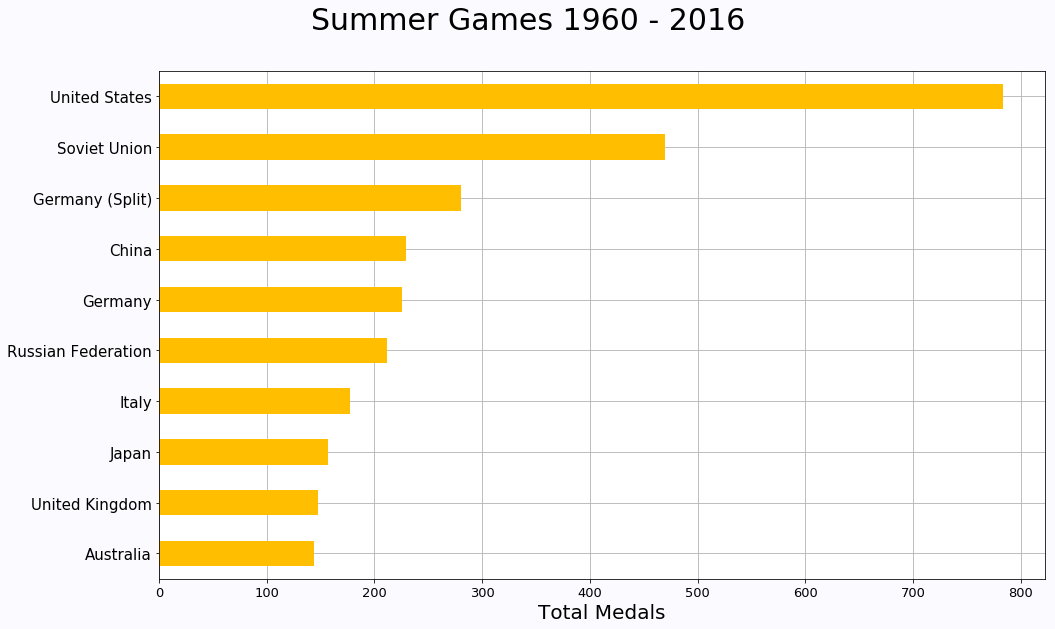

In [12]:
fig, ax = plt.subplots(facecolor='#fafaff')
golds = golds.sort_values(ascending=False)
ax = golds.head(10).sort_values(ascending=True).plot(kind='barh',fontsize=13,color='#ffbf00')
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.yticks(size = 15)
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Total Medals',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/gold.png')

The united states are the clear winners via this metric for success with almost 800 medals, the issue with this system is that does not take into consideration how many bronze and silver medals each country have won

### By Summer By Winter 
We also examined the winners by golds at the summer and winter games

In [27]:
temp = df[['Country','Gold','Winter','Summer']]
temp.head(3)

,Country,Gold,Winter,Summer
0,Argentina,0,False,True
1,Argentina,0,False,True
2,Australia,1,False,True


In [30]:
tempS = temp[temp.Summer][['Country','Gold']]
tempS.head(3)

,Country,Gold
0,Argentina,0
1,Argentina,0
2,Australia,1


In [31]:
tempW = temp[temp.Winter][['Country','Gold']]
tempW.head(3)

,Country,Gold
415,Austria,1
416,Austria,0
417,Austria,0


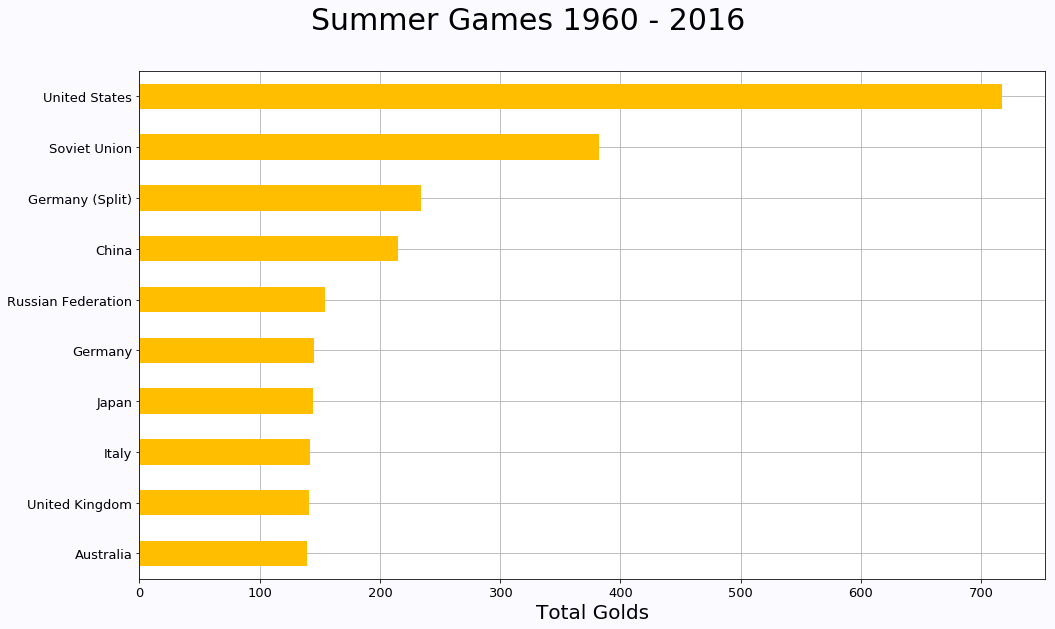

In [32]:
fig, ax = plt.subplots(facecolor='#fafaff')
goldsS = tempS.groupby('Country')['Gold'].sum()
goldsS = goldsS.sort_values(ascending=False)
goldsS.head(10).sort_values(ascending=True).plot(kind='barh',ax=ax,fontsize=13,color='#ffbf00')
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Total Golds',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/goldS.png')

The above graph shows the gold medals won by countries in all summer games from 1960-2016

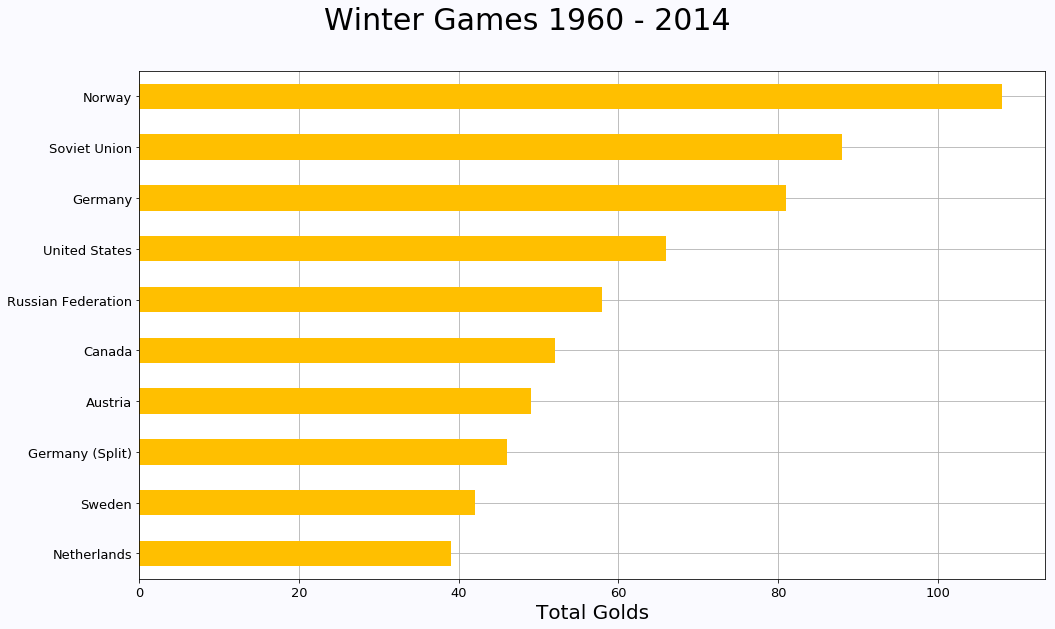

In [35]:
fig, ax = plt.subplots(facecolor='#fafaff')
goldsW = tempW.groupby('Country')['Gold'].sum()
goldsW = goldsW.sort_values(ascending=False)
ax = goldsW.head(10).sort_values(ascending=True).plot(kind='barh',fontsize=13,color='#ffbf00')
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Total Golds',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Winter Games 1960 - 2014', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/goldW.png')

The above graph shows the top 10 most winning countries when it comes to golds in the Winter Olympic Games

# By Total Medals
The next metric by which we can measure success is by total medals

In [37]:
total =df.groupby('Country')['Total_Medals'].sum()
total.head()

Country
Afghanistan      2
Algeria         17
Argentina       36
Armenia         14
Australia      497
Name: Total_Medals, dtype: int64

Finds the breakdown in medals won for every country in the top ten for medals won

In [38]:
total = total.sort_values(ascending=False)
countries = total.head(10).index
medalBreakdown = df.groupby('Country')[['Gold','Silver','Bronze','Total_Medals']].sum().reset_index()
medalBreakdown = medalBreakdown[medalBreakdown.Country.isin(countries)]
medalBreakdown = medalBreakdown.sort_values('Total_Medals')
medalBreakdown.head()

,Country,Gold,Silver,Bronze,Total_Medals
130,United Kingdom,148,160,176,484
40,France,142,150,200,492
4,Australia,144,173,180,497
59,Italy,177,149,189,515
99,Russian Federation,212,174,186,572


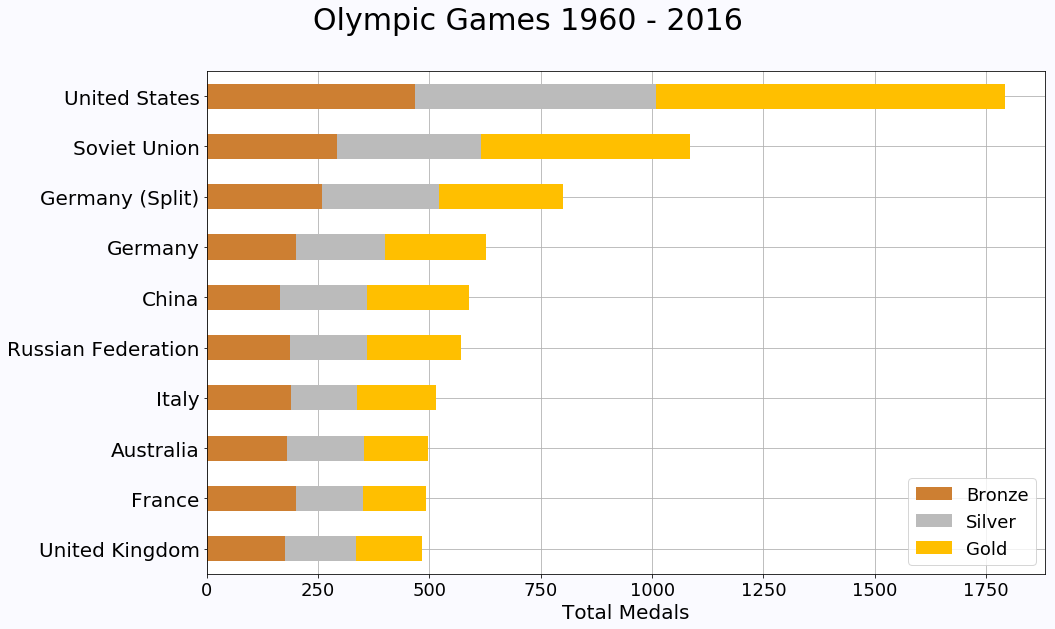

In [39]:
fig, ax = plt.subplots(facecolor='#fafaff')
medalBreakdown.set_index('Country')[['Bronze','Silver','Gold']].plot(kind='barh',ax=ax, stacked=True,color=['#cd7f32','#bbbbbb','#ffbf00'])
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Total Medals',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Olympic Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/total.png')

The above graph shows the top 10 most winning countries when it comes to total medals, the united states still hold the top spot with over 1,750 medals. The issue with system is that there is an equal weight placed on the different types of medals, this means that a gold medal for example is weighted the same as a bronze which isnt the case

## By Summer and Winter
Here we make bar charts showing the top ten countries in both the summer and winter games usin gtotal medals

In [44]:
temp = df[['Country','Total_Medals','Winter','Summer']]
temp.head(3)

,Country,Total_Medals,Winter,Summer
0,Argentina,1,False,True
1,Argentina,1,False,True
2,Australia,3,False,True


In [45]:
tempS = temp[temp.Summer][['Country','Total_Medals',]]
tempS.head(3)

,Country,Total_Medals
0,Argentina,1
1,Argentina,1
2,Australia,3


In [46]:
tempW = temp[temp.Winter][['Country','Total_Medals']]
tempW.head(3)

,Country,Total_Medals
415,Austria,2
416,Austria,1
417,Austria,1


In [47]:
totalS = tempS.groupby('Country')['Total_Medals'].sum()
totalS = totalS.sort_values(ascending=False)
countries = totalS.head(10).index
medalBreakdown = df[df.Summer].groupby('Country')[['Gold','Silver','Bronze','Total_Medals']].sum().reset_index()
medalBreakdown = medalBreakdown[medalBreakdown.Country.isin(countries)]
medalBreakdown = medalBreakdown.sort_values('Total_Medals')
medalBreakdown.head()

,Country,Gold,Silver,Bronze,Total_Medals
61,Japan,144,107,153,404
59,Italy,142,117,147,406
43,Germany,145,118,154,417
97,Russian Federation,154,137,150,441
128,United Kingdom,141,158,170,469


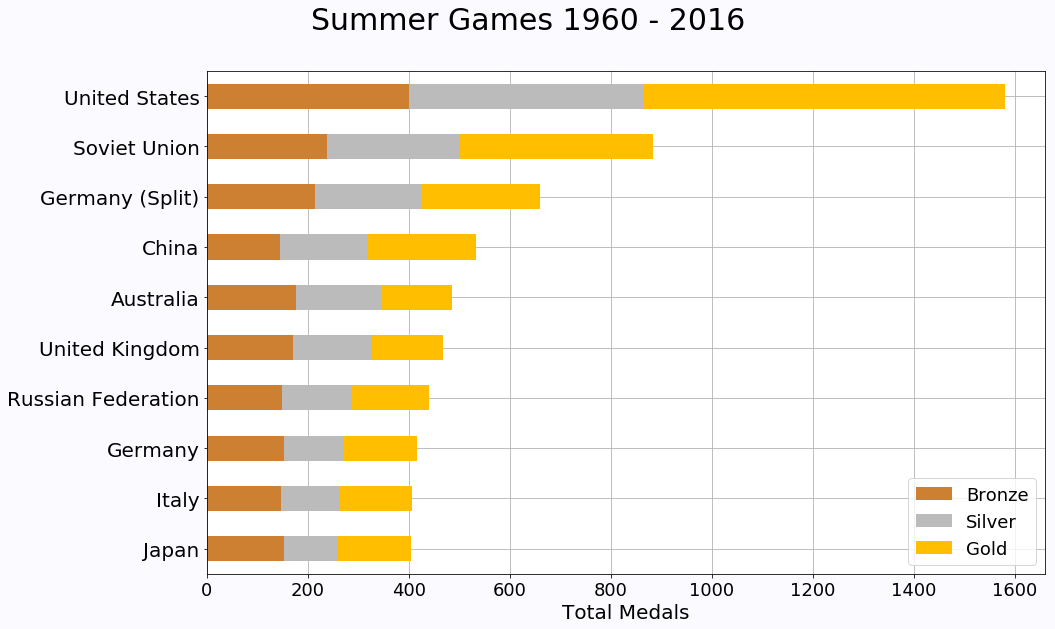

In [48]:
fig, ax = plt.subplots(facecolor='#fafaff')
medalBreakdown.set_index('Country')[['Bronze','Silver','Gold']].plot(kind='barh',ax=ax, stacked=True,color=['#cd7f32','#bbbbbb','#ffbf00'])
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Total Medals',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/totalS.png')

The above graph shows the top 10 countries in the Summer games by medal count between 1960 and 2016

In [49]:
totalW = tempW.groupby('Country')['Total_Medals'].sum()
totalW = totalW.sort_values(ascending=False)
countries = totalW.head(10).index
medalBreakdown = df[~df.Summer].groupby('Country')[['Gold','Silver','Bronze','Total_Medals']].sum().reset_index()
medalBreakdown = medalBreakdown[medalBreakdown.Country.isin(countries)]
medalBreakdown = medalBreakdown.sort_values('Total_Medals')
medalBreakdown.head()

,Country,Gold,Silver,Bronze,Total_Medals
25,Netherlands,39,35,38,112
12,Finland,33,48,50,131
30,Russian Federation,58,37,36,131
15,Germany (Split),46,48,46,140
5,Canada,52,53,41,146


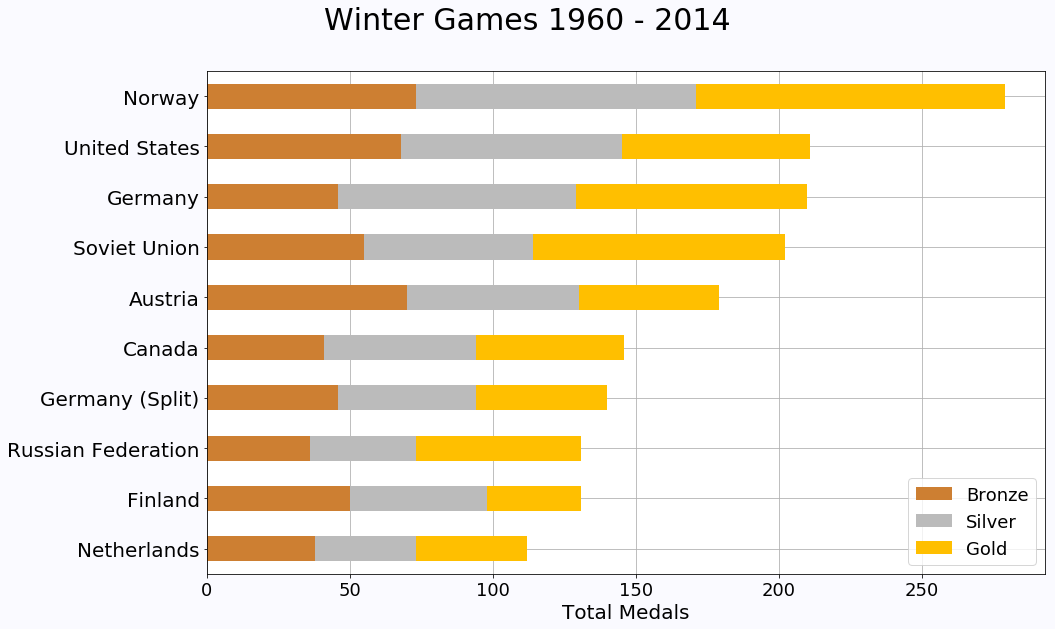

In [51]:
fig, ax = plt.subplots(facecolor='#fafaff')
medalBreakdown.set_index('Country')[['Bronze','Silver','Gold']].plot(kind='barh',ax=ax, stacked=True,color=['#cd7f32','#bbbbbb','#ffbf00'])
plt.grid()
plt.ylabel('',fontsize=20)
plt.xlabel('Total Medals',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Winter Games 1960 - 2014', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/totalW.png')

The above graph shows the top 10 countries when it comes to the total medals in the Winter Games

 # By Weighted System
 The weighted system we will apply weights each medal type differently<br>
 the ratings attributed to each medal are as follows:<br>
 * Gold - <b>3</b>
 * Silver - <b>2</b>
 * Bronze - <b>1</b>

In [52]:
weight =df.groupby('Country')['Ath_Rating'].sum()
weight.head()

Country
Afghanistan      2
Algeria         31
Argentina       62
Armenia         24
Australia      958
Name: Ath_Rating, dtype: int64

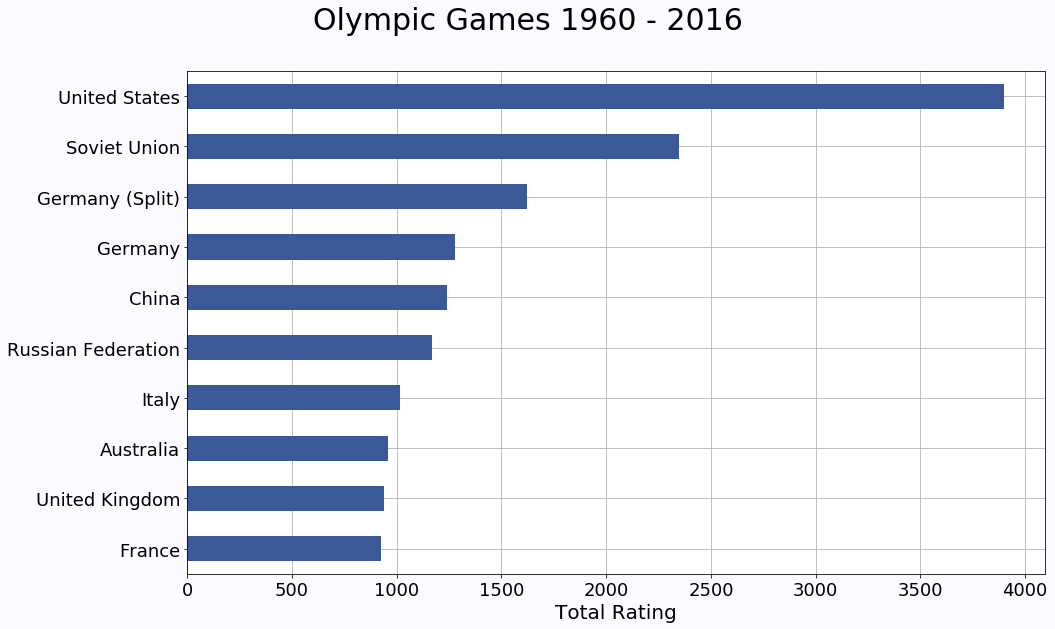

In [176]:
fig, ax = plt.subplots(facecolor='#fafaff')
weight = weight.sort_values(ascending=False)
weight.head(10).sort_values(ascending=True).plot(kind='barh',ax=ax,color='#3b5998')
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Total Rating',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Olympic Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/rating.png')

Above shows the top 10 countries when it comes to rating share in all Olympic Games from 1960-2016

## By Winter and Summer
Show the top 10 for the winter and summer games using the rating system

In [54]:
temp = df[['Country','Ath_Rating','Winter','Summer']]
temp.head(3)

,Country,Ath_Rating,Winter,Summer
0,Argentina,2,False,True
1,Argentina,1,False,True
2,Australia,7,False,True


In [55]:
tempS = temp[temp.Summer][['Country','Ath_Rating']]
tempS.head(3)

,Country,Ath_Rating
0,Argentina,2
1,Argentina,1
2,Australia,7


In [56]:
tempW = temp[temp.Winter][['Country','Ath_Rating']]
tempW.head(3)

,Country,Ath_Rating
415,Austria,4
416,Austria,2
417,Austria,2


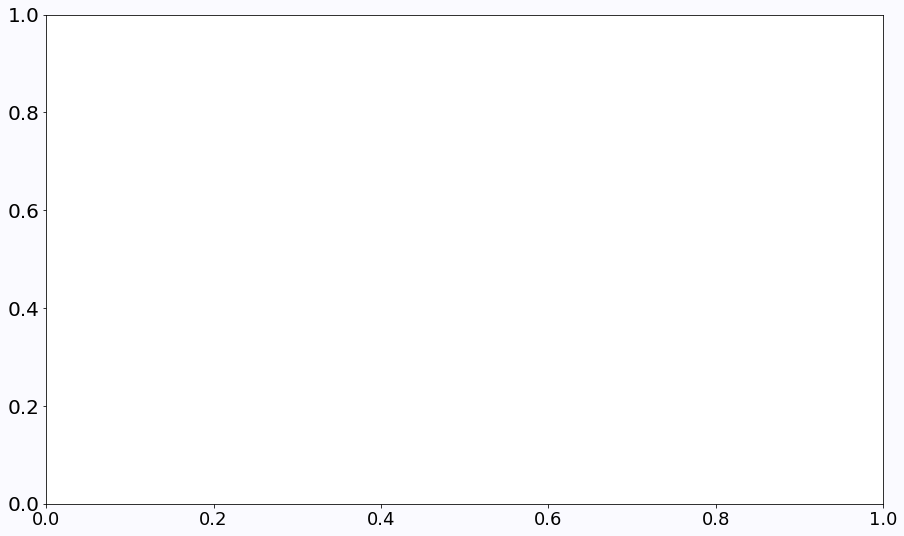

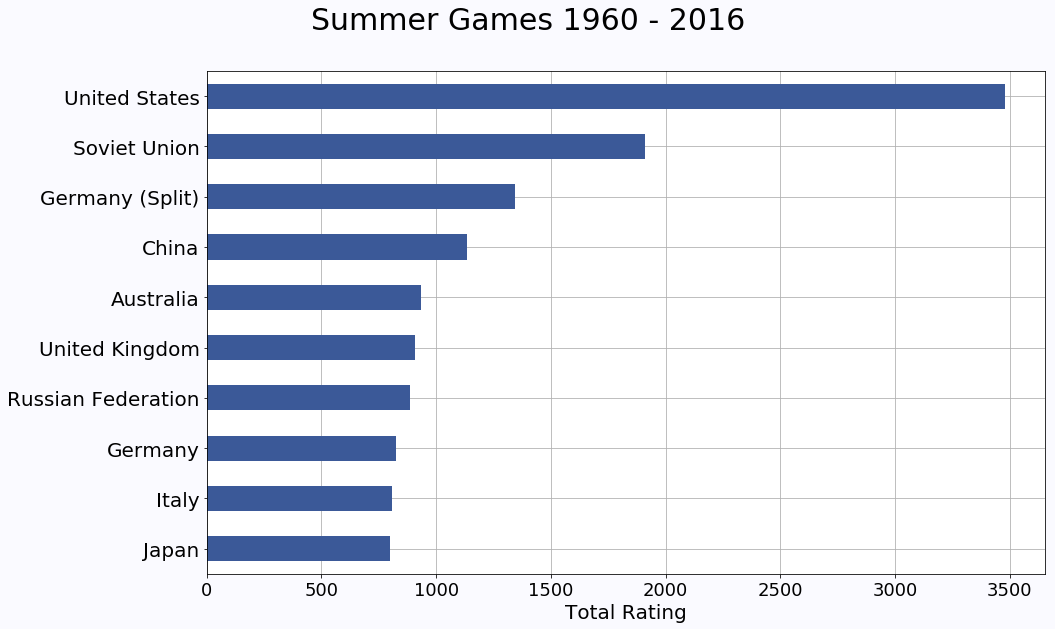

In [57]:
fig, ax = plt.subplots(facecolor='#fafaff')
ratingS = tempS.groupby('Country')['Ath_Rating'].sum()
ratingS = ratingS.sort_values(ascending=False)
ratingS.head(10).sort_values(ascending=True).plot(kind='barh',ax=ax,color='#3b5998')
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Total Rating',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/rantingS.png')

Above is the the top 10 countries in the summer games from 1960 - 2016

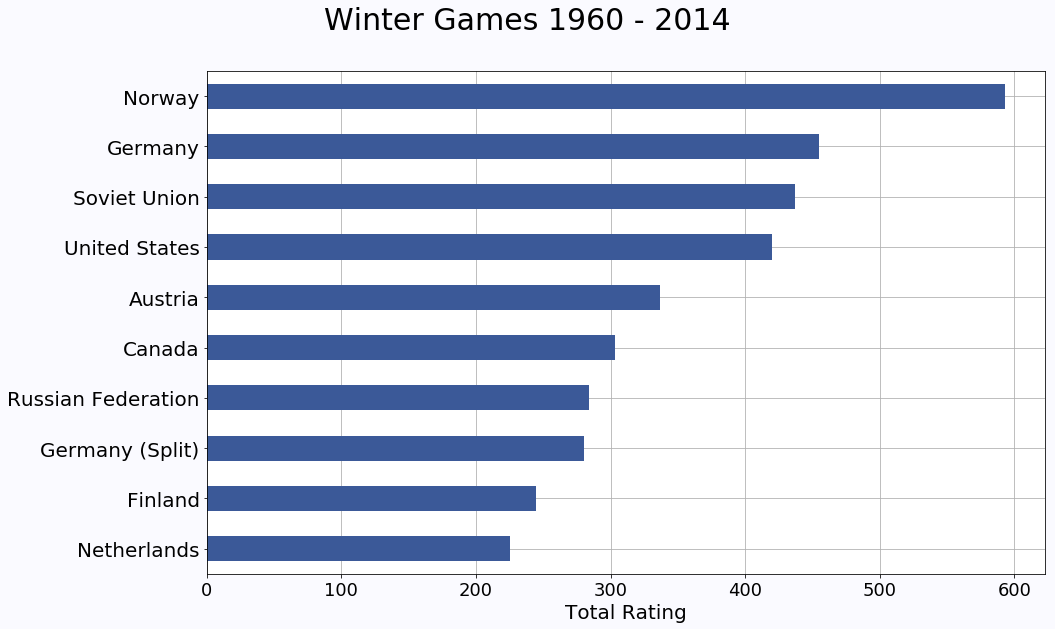

In [58]:
fig, ax = plt.subplots(facecolor='#fafaff')
ratingW = tempW.groupby('Country')['Ath_Rating'].sum()
ratingW = ratingW.sort_values(ascending=False)
ratingW.head(10).sort_values(ascending=True).plot(kind='barh',ax=ax,color='#3b5998')
plt.grid()
plt.ylabel('',fontsize=20)
plt.xlabel('Total Rating',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Winter Games 1960 - 2014', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/ratingW.png')

Above is the top 10 countries in the winter games between 1960 and 2014 if we use the rating system

# Evaluating Rating Share, Medal Share and Gold Share

Gets the total amount of medals awarded at each given games

In [59]:
medalsAwarded = df.groupby("Host_City")['Gold','Total_Medals','Ath_Rating'].sum()
medalsAwarded.head()

,Gold,Total_Medals,Ath_Rating
Host_City,,,
Albertville,64,182,372
Athens,329,980,1949
Atlanta,288,867,1724
Barcelone,282,852,1686
Beijing,321,987,1939


Evaluates how many medals each country won at each games

In [60]:
medalsWon = df.groupby(['Country',"Host_City"])['Gold','Total_Medals','Ath_Rating'].sum()
medalsWon.head()

Gold  Total_Medals  Ath_Rating
Country     Host_City                                
Afghanistan Beijing       0             1           1
            London        0             1           1
Algeria     Atlanta       2             3           7
            Barcelone     1             2           4
            Beijing       0             2           3

getGoldShare works out the share of golds avaliable that each country won

In [62]:
def getGoldshare(row):
    return  row.Gold/medalsAwarded.loc[row.Host_City ]['Gold']

Gets gold share each country won at each games

In [63]:
medalsWon = medalsWon.reset_index(level='Host_City')
goldshare = medalsWon.apply(getGoldshare,axis=1)
medalsWon['Gold_Share'] = goldshare
medalsWon.head()

,Host_City,Gold,Total_Medals,Ath_Rating,Gold_Share
Country,,,,,
Afghanistan,Beijing,0,1,1,0.000000
Afghanistan,London,0,1,1,0.000000
Algeria,Atlanta,2,3,7,0.006944
Algeria,Barcelone,1,2,4,0.003546
Algeria,Beijing,0,2,3,0.000000


getMedal Share gets the share of total medals that each country won at a give games

In [64]:
def getMedalshare(row):
    return  row.Total_Medals/medalsAwarded.loc[row.Host_City ]['Total_Medals']

In [65]:
medalshare = medalsWon.apply(getMedalshare,axis=1)
medalsWon['Medal_Share'] = medalshare
medalsWon.head()

,Host_City,Gold,Total_Medals,Ath_Rating,Gold_Share,Medal_Share
Country,,,,,,
Afghanistan,Beijing,0,1,1,0.000000,0.001013
Afghanistan,London,0,1,1,0.000000,0.001003
Algeria,Atlanta,2,3,7,0.006944,0.003460
Algeria,Barcelone,1,2,4,0.003546,0.002347
Algeria,Beijing,0,2,3,0.000000,0.002026


getRatingShare gets the share of ratings at each games that each country won

In [66]:
def getRatingshare(row):
    return  row.Ath_Rating/medalsAwarded.loc[row.Host_City ]['Ath_Rating']

In [67]:
ratingshare = medalsWon.apply(getRatingshare,axis=1)
medalsWon['Rating_Share'] = ratingshare
medalsWon.head()

,Host_City,Gold,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
Country,,,,,,,
Afghanistan,Beijing,0,1,1,0.000000,0.001013,0.000516
Afghanistan,London,0,1,1,0.000000,0.001003,0.000513
Algeria,Atlanta,2,3,7,0.006944,0.003460,0.004060
Algeria,Barcelone,1,2,4,0.003546,0.002347,0.002372
Algeria,Beijing,0,2,3,0.000000,0.002026,0.001547


# Disparity in Medals Awarded
Shows why comparissons between games using just rating achieved dont work

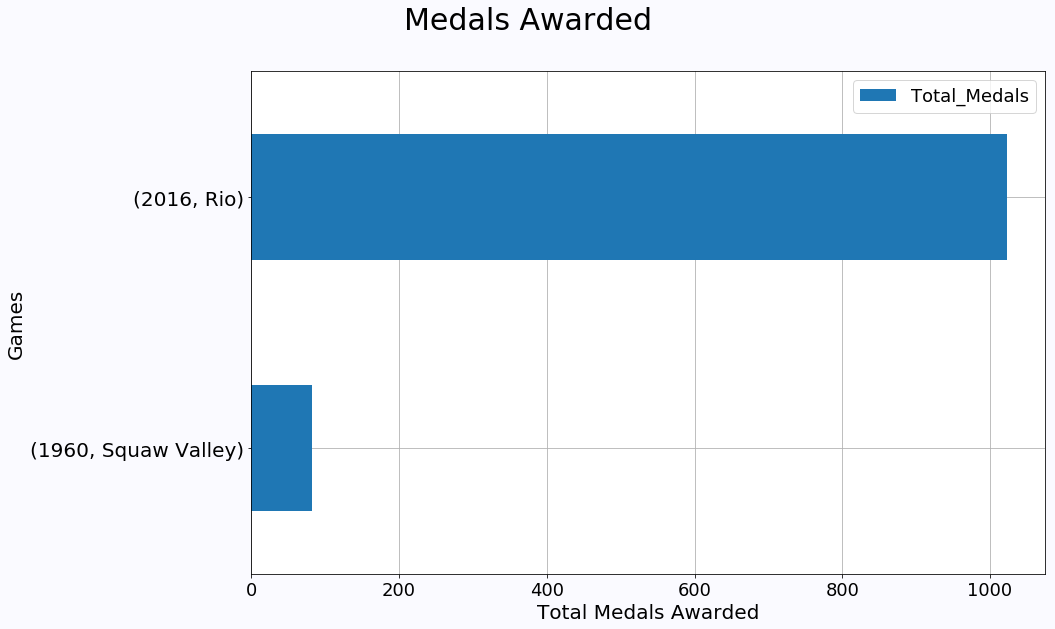

In [69]:
fig, ax = plt.subplots(facecolor='#fafaff')
temp = df.groupby(['Year','Host_City','Summer'])[['Total_Medals']].sum().reset_index().sort_values('Total_Medals').reset_index()
a = temp.iloc[[0,-1]]
a[['Year','Host_City','Total_Medals']].set_index(['Year','Host_City']).plot(kind='barh',ax=ax)
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Games',fontsize=20)
plt.xlabel('Total Medals Awarded',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Medals Awarded', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/medalGamesHighLow.png')


The above graph shows the difference in medals awarded in the 2016 Olympics in Rio as compared to the number of medals awarded to athletes to athletes in the the 1960 winter olympics in Squaw valley

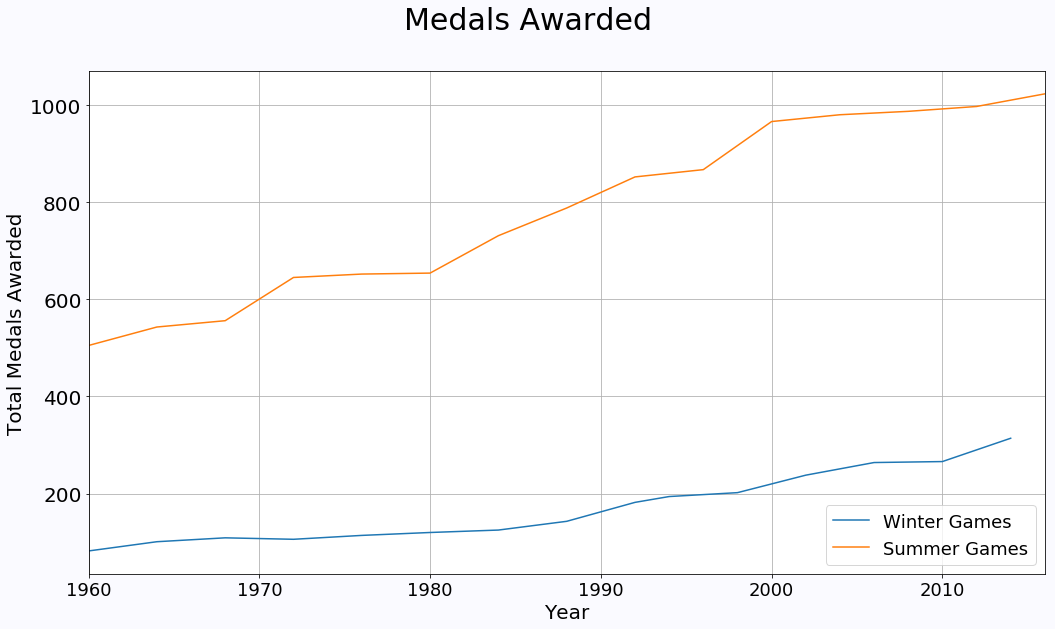

In [70]:
fig, ax = plt.subplots(facecolor='#fafaff')
temp[~temp.Summer].sort_values('Year').set_index('Year').Total_Medals.plot(label="Winter Games")
temp[temp.Summer].sort_values('Year').set_index('Year').Total_Medals.plot(label="Summer Games")
plt.legend(loc=4)
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Total Medals Awarded',fontsize=20)
plt.xlabel('Year',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Medals Awarded', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/medalGames.png')



The above line graph shows the change in the number of medals awarded in both the summer and winter olympics from 1960 onwards. what is clear is that the number of medals awarded in both games have been drastically increasing 

# Rating Share
To be able to compare countries competeing in different games we elected to use the share of ratings they won as our method of comparrison

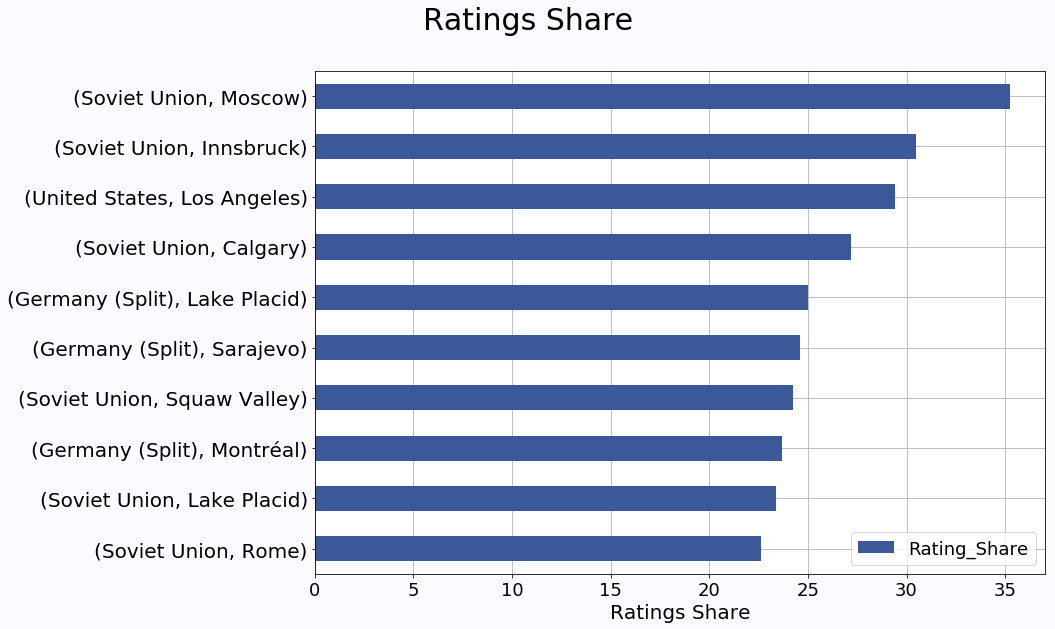

In [72]:
fig, ax = plt.subplots(facecolor='#fafaff')
temp = medalsWon.sort_values('Rating_Share',ascending=False)[['Host_City','Rating_Share']].head(10)
temp['Rating_Share'] = temp['Rating_Share']*100
temp.set_index(['Host_City'], append=True).sort_values('Rating_Share',ascending=True).plot(kind='barh',ax=ax,color='#3b5998')
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Ratings Share',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Ratings Share', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/ratingShare.png')

The above graph shows the top ten performances in a single olympic games i.e. the highest rating shares achieved

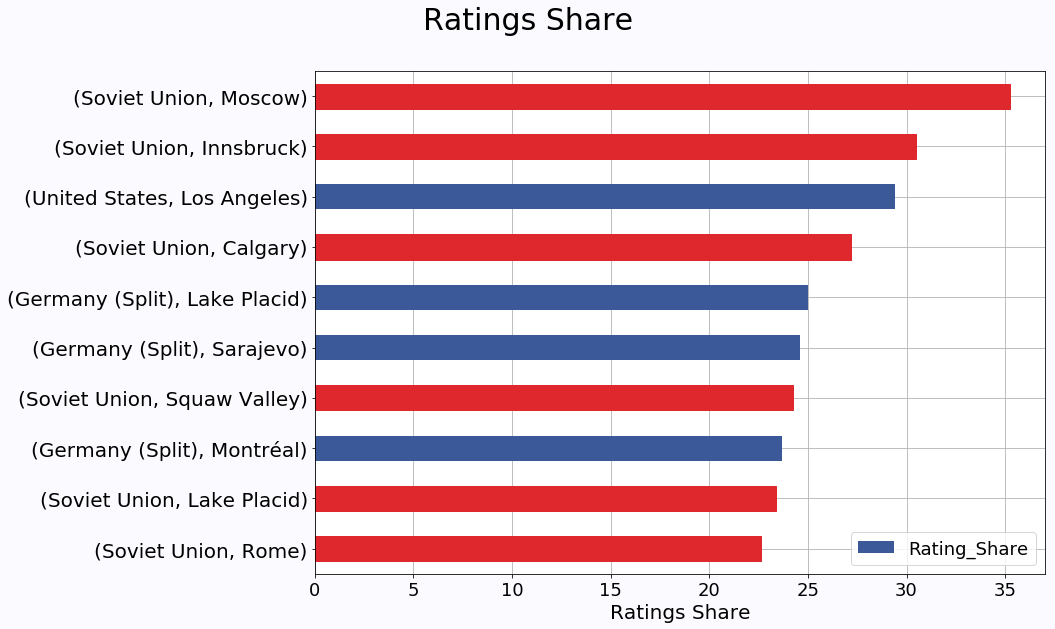

In [74]:
fig, ax = plt.subplots(facecolor='#fafaff')
temp = medalsWon.sort_values('Rating_Share',ascending=False)[['Host_City','Rating_Share']].head(10)
temp['Rating_Share'] = temp['Rating_Share']*100
temp.set_index(['Host_City'], append=True).sort_values('Rating_Share',ascending=True).plot(kind='barh',ax=ax,color='#3b5998')
plt.grid()

temp = []
for i in ax.get_children():
    if isinstance(i, patches.Rectangle):
        temp.append(i)
temp[0].set_color('#DE282E')
temp[1].set_color('#DE282E')
temp[3].set_color('#DE282E')
temp[6].set_color('#DE282E')
temp[8].set_color('#DE282E')
temp[9].set_color('#DE282E')

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Ratings Share',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Ratings Share', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/ratingShareCol.png')

The above graph again demonstrates the top 10 most dominant performances in the olympic games but highlights the soviet unions performances

# Number of games each country have competed in?


We will first only look at the top 10 countries

In [78]:
topFive = ['United States','Soviet Union','Germany (Split)','Germany','Russian Federation']

We then find how many games each have competed in

In [79]:
countries = df.Country.unique()
comp = dict()
for country in countries:
    if country in topFive:
        comp[country] = len(df[df.Country == country].Host_City.unique())

Finally, we plot this as a bar chart

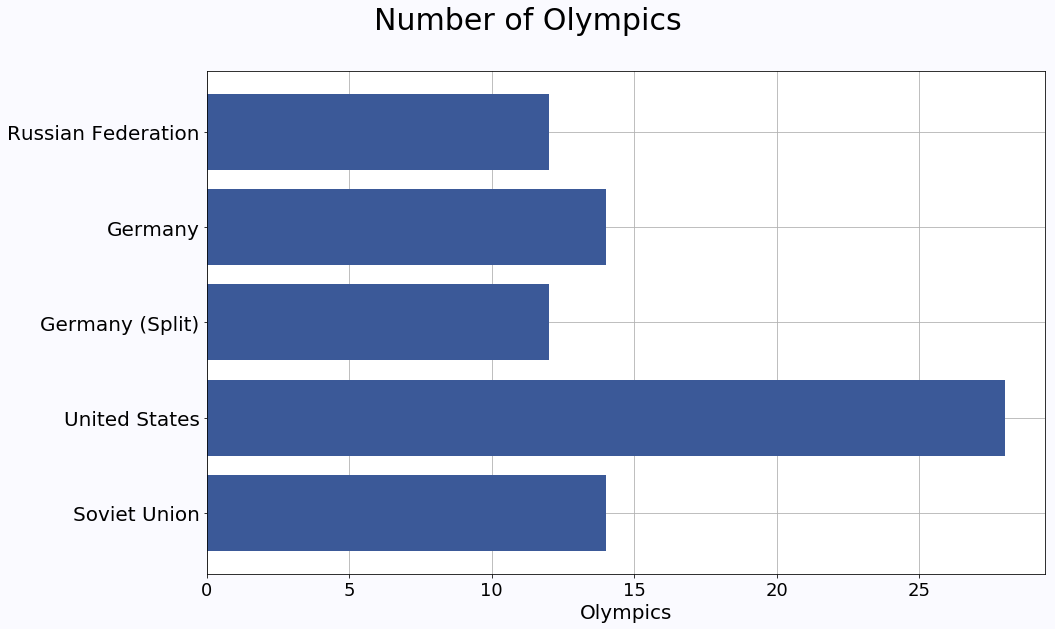

In [81]:
fig, ax = plt.subplots(facecolor='#fafaff')
plt.barh(range(len(comp)), list(comp.values()), align='center',color='#3b5998')
plt.yticks(range(len(comp)), list(comp.keys()))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Olympics',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Number of Olympics', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/topFiveCompetiton.png')

What is clear is that even in the tope 5 that all countries do not compete in every games, we must therefore come up with a different methodology to countries in how they have succeed throughout the years 1960 - 2016

# Average Rating Share
To compare these countries over the years and figure our what countries have been the most successful we have elected to useaverage rating share, this facilitates comparrison of countries that may not have competed in the same number of games

In [84]:
averageShares = medalsWon.groupby('Country')['Gold_Share','Medal_Share','Rating_Share'].mean()
averageShares.head()

,Gold_Share,Medal_Share,Rating_Share
Country,,,
Afghanistan,0.000000,0.001008,0.000514
Algeria,0.002396,0.002672,0.002436
Argentina,0.002034,0.003532,0.002997
Armenia,0.001293,0.002865,0.002505
Australia,0.026792,0.030612,0.029581


We then plot the results

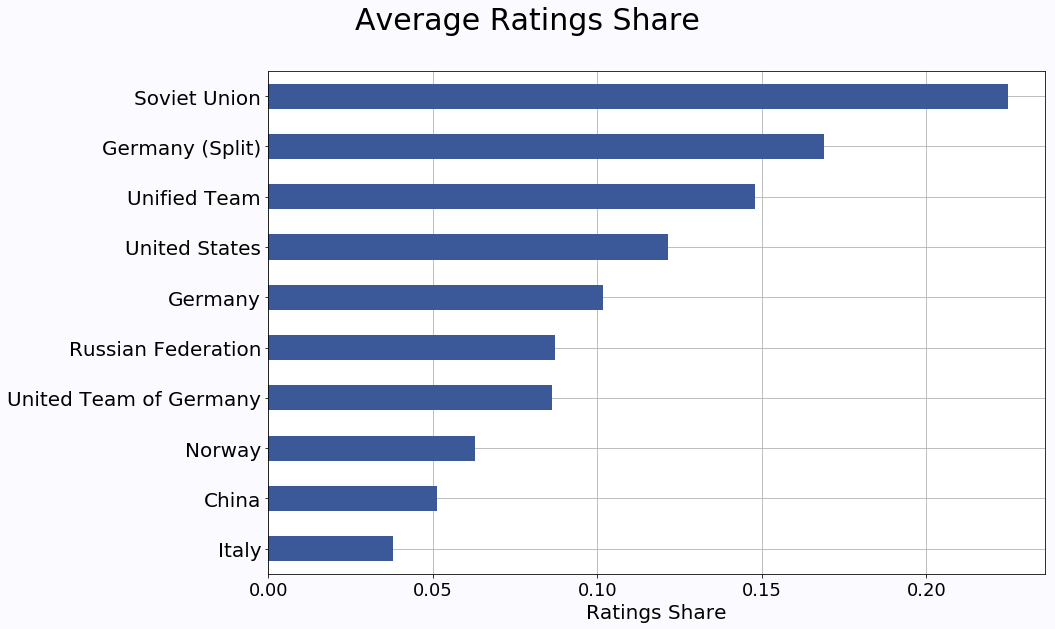

In [86]:
fig, ax = plt.subplots(facecolor='#fafaff')
temp = averageShares.sort_values('Rating_Share',ascending=False).head(10).sort_values('Rating_Share',ascending=True)
temp.Rating_Share.plot(kind='barh',ax=ax,color='#3b5998')
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('Ratings Share',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Average Ratings Share', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/AverageRatingShare.png')

The above graph shows the most successful countries in terms of their average rating share ahcieved over all the games in whihc they competed